In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter, OrderedDict
from nltk.corpus import stopwords
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import re

%matplotlib inline

In [2]:
tt9 = pd.read_csv('../data/db15/helpers/tt9.csv')
tt15 = pd.read_csv('../data/db15/helpers/tt15.csv')

In [3]:
tt15[tt15['T2 Type'] == 'Technology'].major_title.unique()

array(['Management Occupations',
       'Business and Financial Operations Occupations', nan,
       'Computer and Mathematical Occupations',
       'Architecture and Engineering Occupations',
       'Life, Physical, and Social Science Occupations',
       'Community and Social Service Occupations', 'Legal Occupations',
       'Education, Training, and Library Occupations',
       'Arts, Design, Entertainment, Sports, and Media Occupations',
       'Healthcare Practitioners and Technical Occupations',
       'Healthcare Support Occupations', 'Protective Service Occupations',
       'Food Preparation and Serving Related Occupations',
       'Building and Grounds Cleaning and Maintenance Occupations',
       'Personal Care and Service Occupations',
       'Sales and Related Occupations',
       'Office and Administrative Support Occupations',
       'Farming, Fishing, and Forestry Occupations',
       'Construction and Extraction Occupations',
       'Installation, Maintenance, and Repai

# New occpuations

In [4]:
code= 'O*NET-SOC Code'
occ9 = set(tt9[code])
occ15 = set(tt15[code])

new = occ15 - occ9
entries = tt15[tt15[code].isin(new)]
further_subset = entries[~entries.Title.isin(tt9.Title)]

In [5]:
df = further_subset[['O*NET-SOC Code', 'Title', 'broad_title', 'minor_title', 'major_title']].drop_duplicates()

In [6]:
df.to_csv('../data/db15/helpers/new_non_cleaned_occupations.csv', index = False)

In [7]:
df

,O*NET-SOC Code,Title,broad_title,minor_title,major_title
166,11-1031.00,Legislators,Legislators,Top Executives,Management Occupations
818,11-3051.01,Quality Control Systems Managers,Industrial Production Managers,Operations Specialties Managers,Management Occupations
1495,11-9013.01,Nursery and Greenhouse Managers,"Farmers, Ranchers, and Other Agricultural Mana...",Other Management Occupations,Management Occupations
1561,11-9013.02,Farm and Ranch Managers,"Farmers, Ranchers, and Other Agricultural Mana...",Other Management Occupations,Management Occupations
1669,11-9013.03,Aquacultural Managers,"Farmers, Ranchers, and Other Agricultural Mana...",Other Management Occupations,Management Occupations
1904,11-9039.01,Distance Learning Coordinators,Education Administrators,Other Management Occupations,Management Occupations
1947,11-9039.02,Fitness and Wellness Coordinators,Education Administrators,Other Management Occupations,Management Occupations
2465,11-9131.00,Postmasters and Mail Superintendents,Postmasters and Mail Superintendents,Other Management Occupations,Management Occupations
2585,11-9161.00,Emergency Management Directors,Emergency Management Directors,Other Management Occupations,Management Occupations
2766,11-9199.03,Investment Fund Managers,Miscellaneous Managers,Other Management Occupations,Management Occupations


In [8]:
filt = ['O*NET-SOC Code', 'Title', 'broad_title', 'minor_title', 'major_title']
tt15_occs = tt15[filt].drop_duplicates()
tt9_occs = tt9[filt].drop_duplicates()
tt9_occs[tt9_occs.Title.apply(lambda x: 'market research' in x.lower())]

,O*NET-SOC Code,Title,broad_title,minor_title,major_title
15147,19-3021.00,Market Research Analysts,NaN,NaN,NaN


## Emerging

In [9]:
nae = pd.read_csv('../data/db15/helpers/bright_outlooks/New_and_Emerging.csv')
subset = tt15[tt15['O*NET-SOC Code'].isin(nae.Code)][filt].drop_duplicates()
subset[~subset['O*NET-SOC Code'].isin(occ9)].to_csv('../data/db15/helpers/new_emerging_since_2009.csv', index = True)

In [10]:
tt15_occs[~tt15_occs.minor_title.isin(tt9_occs.minor_title)].minor_title.unique()

array(['Religious Workers', 'Postsecondary Teachers',
       'Animal Care and Service Workers', 'Personal Appearance Workers',
       'Tour and Travel Guides', 'Communications Equipment Operators',
       'Fishing and Hunting Workers',
       'Textile, Apparel, and Furnishings Workers'], dtype=object)

# How often does ONET update?

- Since 2009 at least skills updated
- but taxonomy updated every so often – last in 2010

# Automation by new occupations

In [11]:
nae = pd.read_csv('../data/db15/helpers/new_emerging_since_2009.csv')

In [12]:
automation = pd.read_csv('../data/db15/helpers/delta_9_15.csv')

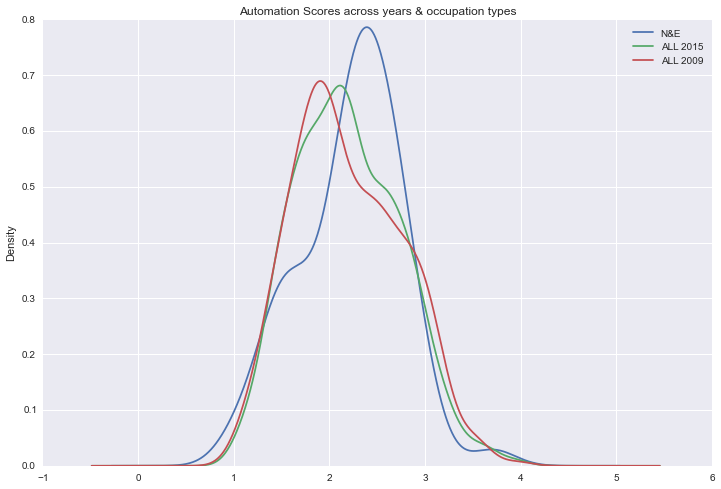

In [15]:
sns.plt.figure(figsize = (12,8))
automation[automation['O*NET-SOC Code'].isin(nae['O*NET-SOC Code'])].automation_15.plot(kind = 'kde', label = 'N&E')
automation.automation_15.plot(kind = 'kde', label = 'ALL 2015')
automation.automation_9.plot(kind = 'kde', label = 'ALL 2009')

sns.plt.title('Automation Scores across years & occupation types')
sns.plt.legend()

# Adoption propensity of new technologies

In [16]:
nae_tech = tt15[tt15['O*NET-SOC Code'].isin(nae['O*NET-SOC Code'])]

In [17]:
non_nae_tech = tt15[~tt15['O*NET-SOC Code'].isin(nae['O*NET-SOC Code'])]

In [18]:
nae_tech[nae_tech.segment_code == 43000000].groupby('O*NET-SOC Code').count()['T2 Type'].mean()

44.83606557377049

In [19]:
non_nae_tech[non_nae_tech.segment_code == 43000000].groupby('O*NET-SOC Code').count()['T2 Type'].mean()

27.42151481888035

> ### N&E occupations adopt at a massively higher rate

# New technologies similar in polarization

# Technology Use vs. Automation

In [20]:
tech_counts = pd.DataFrame(tt15[tt15['T2 Type'] == 'Technology'].groupby("O*NET-SOC Code").count()['T2 Type']).reset_index()
tech_counts.columns = ['O*NET-SOC Code', 'num_tech']
merged = automation.merge(tech_counts, how = 'left', on = 'O*NET-SOC Code')

In [21]:
merged.head()

,O*NET-SOC Code,automation_15,automation_9,delta,delta_pct,Title,num_tech
0,43-5081.03,3.01,1.53,1.48,0.967320,"Stock Clerks- Stockroom, Warehouse, or Storage...",8
1,19-1020.01,2.02,1.07,0.95,0.887850,Biologists,47
2,41-2012.00,3.11,1.74,1.37,0.787356,Gaming Change Persons and Booth Cashiers,4
3,47-2011.00,2.64,1.57,1.07,0.681529,Boilermakers,7
4,21-2011.00,2.01,1.25,0.76,0.608000,Clergy,10


In [22]:
np.mean(abs(merged.delta_pct) < 0.03)

0.38364779874213839

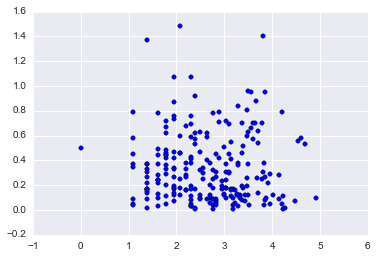

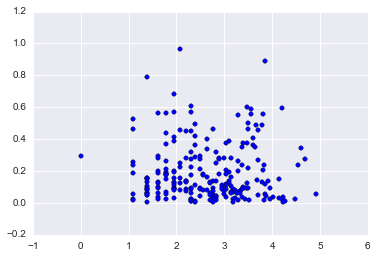

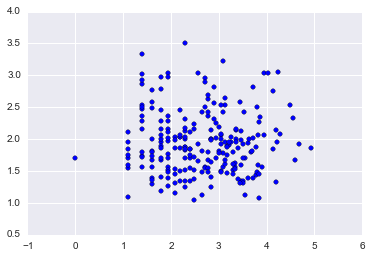

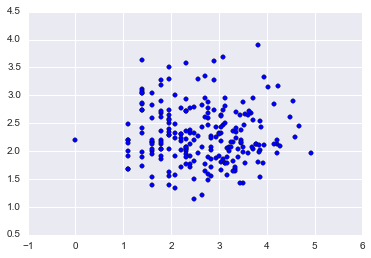

In [23]:
merged_ss = merged[merged.delta > 0]

for outcome in ['delta', 'delta_pct', 'automation_9', 'automation_15']:
    sns.plt.figure()
    sns.plt.scatter(np.log(merged_ss.num_tech), merged_ss[outcome])

# Technological Adoption vs. Automation

### using number of tech adopted since 2009

In [24]:
tech15 = tt15[tt15['T2 Type'] == 'Technology']
tech9 = tt9[tt9['T2 Type'] == 'Technology']

occs = set(tech9['O*NET-SOC Code'])

new_df = pd.DataFrame(columns=tech9.columns)

for occ in occs:
    pre_gb = tech9[tech9['O*NET-SOC Code'] == occ]
    post_gb = tech15[tech15['O*NET-SOC Code'] == occ]
    new = post_gb[(~post_gb['Commodity Code'].isin(pre_gb['Commodity Code'])) & (~post_gb['T2 Example'].isin(pre_gb['T2 Example']))]
    new_df = new_df.append(new)

In [25]:
counts = new_df.groupby('O*NET-SOC Code').count()['Title']
counts_df = pd.DataFrame(counts)
counts_df.columns = ['count']
counts_df = counts_df.reset_index()

In [26]:
automation_counts = automation[automation['O*NET-SOC Code'].isin(occs)].merge(counts_df, how = 'left', on = 'O*NET-SOC Code')
automation_counts['count'] = automation_counts['count'].fillna(0)
automation_counts.head()

,O*NET-SOC Code,automation_15,automation_9,delta,delta_pct,Title,count
0,19-1020.01,2.02,1.07,0.95,0.887850,Biologists,1
1,41-2012.00,3.11,1.74,1.37,0.787356,Gaming Change Persons and Booth Cashiers,0
2,47-2011.00,2.64,1.57,1.07,0.681529,Boilermakers,1
3,17-2131.00,2.15,1.34,0.81,0.604478,Materials Engineers,2
4,15-2021.00,2.12,1.33,0.79,0.593985,Mathematicians,0


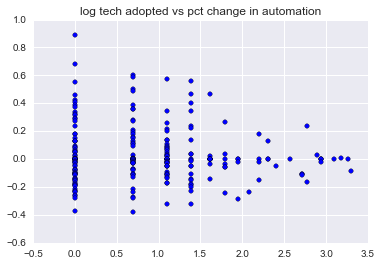

In [27]:
sns.plt.scatter(np.log(automation_counts['count']), automation_counts.delta_pct)
sns.plt.title( 'log tech adopted vs pct change in automation')

### Using ```#tech 2015 - #tech 2009```

In [28]:
from collections import defaultdict

tech15 = tt15[tt15['T2 Type'] == 'Technology']
tech9 = tt9[tt9['T2 Type'] == 'Technology']

occs = set(tech9['O*NET-SOC Code'])

abs_tech_df = defaultdict(int)

for occ in occs:
    pre_gb = len(tech9[tech9['O*NET-SOC Code'] == occ])
    post_gb = len(tech15[tech15['O*NET-SOC Code'] == occ])
    abs_tech_df[occ] = post_gb = pre_gb
    
abs_tech_df = pd.DataFrame(dict(abs_tech_df).items(), columns = ['O*NET-SOC Code', 'tech_count'])

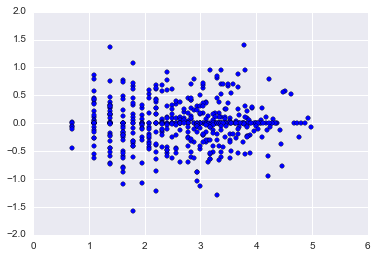

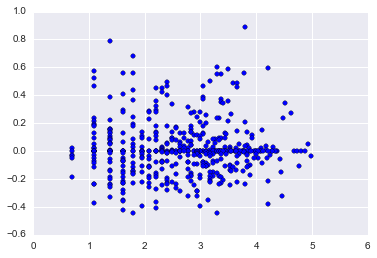

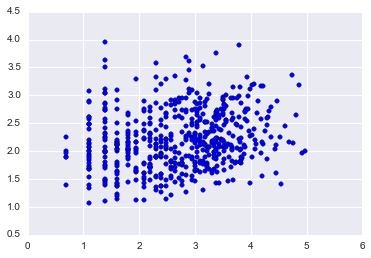

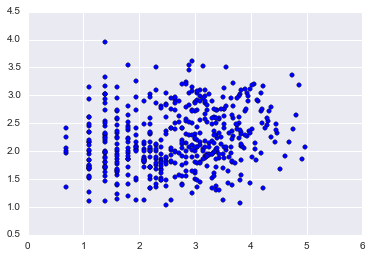

In [29]:
sns.plt.figure(figsize = (10, 10))
a_counts = automation[automation['O*NET-SOC Code'].isin(occs)].merge(abs_tech_df, how = 'left', on = 'O*NET-SOC Code')
a_counts['tech_count'] = a_counts['tech_count'].fillna(0)

for outcome in ['delta', 'delta_pct', 'automation_15', 'automation_9']:
    sns.plt.figure()
    sns.plt.scatter(np.log(a_counts.tech_count), a_counts[outcome])

# Non-technology adoptions

In [37]:
tech15 = tt15.groupby('O*NET-SOC Code')[['O*NET-SOC Code', 'Commodity Code', 'T2 Example']]
tech9 = tt9.groupby('O*NET-SOC Code')[['O*NET-SOC Code', 'Commodity Code', 'T2 Example']]
occs = set(tech9['O*NET-SOC Code'])

new_df = pd.DataFrame(columns=tech9.columns)
for occ in occs:
    pre_gb = tech9[tech9['O*NET-SOC Code'] == occ]
    post_gb = tech15[tech15['O*NET-SOC Code'] == occ]
    new = post_gb[(~post_gb['Commodity Code'].isin(pre_gb['Commodity Code']))]
    new_df = new_df.append(new)

Exception: Column(s) ['O*NET-SOC Code', 'Commodity Code', 'T2 Example'] already selected

In [38]:
d = pd.read_table('../data/db15/Work Context.txt')
d = d[d['Element Name'] == 'Degree of Automation']

/Users/Logan/anaconda/envs/dev/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


# Skill PCA

In [39]:
X = pd.read_table('../data/db09/Skills.txt')
X = X[X['Scale ID'] == 'LV'].pivot(index = 'O*NET-SOC Code', columns = 'Element Name', values='Data Value').reset_index()
X = X.iloc[:,1:]

In [40]:
def get_most_important_features(X, num_components, num_features, custom_metric = None):
    pca = PCA()
    pca.fit(X)
    names = list(X.columns)
    for i in xrange(num_components):
        print "COMPONENT {}:".format(i + 1)
        print "-------------"
        print "Var_exp: {}".format(pca.explained_variance_[i])
        component = pca.components_[i]
        if not custom_metric:
            max_indices = component.argsort()[::-1][:num_features]
        elif custom_metric == '-':
            max_indices = (-component).argsort()[::-1][:num_features]
        elif custom_metric == 'abs':
            max_indices = abs(component).argsort()[::-1][:num_features]
        for index in max_indices:
            value = component[index]
            name = names[index]
            print "{}: {}".format(round(value, 3), name)
        print " "

In [41]:
get_most_important_features(X, num_components = 5, num_features = 5, custom_metric = 'abs')

COMPONENT 1:
-------------
Var_exp: 18.9604779363
-0.275: Science
-0.251: Operations Analysis
-0.222: Equipment Selection
-0.216: Technology Design
-0.212: Complex Problem Solving
 
COMPONENT 2:
-------------
Var_exp: 11.5609218459
-0.378: Equipment Maintenance
-0.359: Repairing
-0.3: Operation Monitoring
-0.298: Installation
-0.271: Operation and Control
 
COMPONENT 3:
-------------
Var_exp: 2.00047061365
-0.438: Systems Analysis
-0.381: Systems Evaluation
-0.378: Operation Monitoring
0.345: Equipment Selection
-0.253: Programming
 
COMPONENT 4:
-------------
Var_exp: 1.7949247742
-0.399: Science
0.39: Management of Financial Resources
0.37: Management of Personnel Resources
0.327: Management of Material Resources
-0.241: Mathematics
 
COMPONENT 5:
-------------
Var_exp: 1.49129122109
-0.425: Management of Financial Resources
0.375: Operation Monitoring
0.334: Operation and Control
0.241: Social Perceptiveness
-0.235: Mathematics
 


## Automated Subset

In [53]:
X

Element Name,Active Learning,Active Listening,Complex Problem Solving,Coordination,Critical Thinking,Equipment Maintenance,Equipment Selection,Installation,Instructing,Judgment and Decision Making,...,Science,Service Orientation,Social Perceptiveness,Speaking,Systems Analysis,Systems Evaluation,Technology Design,Time Management,Troubleshooting,Writing
0,5.21,5.51,5.44,6.34,5.08,2.38,4.08,2.37,4.52,6.54,...,2.57,4.49,5.16,4.96,4.23,5.10,3.53,5.76,3.74,4.95
1,3.50,3.62,3.50,4.00,3.88,0.00,0.25,0.12,3.12,3.50,...,0.00,3.00,3.62,3.75,3.38,3.25,0.75,3.50,1.38,3.75
2,4.28,4.61,3.93,5.46,4.28,0.11,2.69,0.28,3.98,4.52,...,0.24,5.38,3.83,4.30,0.29,0.99,1.94,5.27,1.14,4.65
3,4.12,4.25,3.88,3.88,4.38,0.00,0.00,0.00,3.62,4.00,...,0.00,3.50,4.12,4.25,3.75,3.88,1.12,3.75,0.00,3.75
4,3.88,3.88,4.00,4.25,4.00,0.00,0.00,0.00,3.62,4.12,...,0.00,3.75,4.25,4.25,3.75,4.00,1.12,4.12,0.00,4.00
5,4.65,5.05,4.57,5.08,4.84,0.72,3.43,1.00,3.73,4.34,...,1.94,4.75,5.08,5.04,3.09,3.57,1.64,4.71,2.96,5.16
6,4.58,4.70,3.42,5.32,4.44,1.60,2.74,1.37,4.06,3.61,...,1.15,4.79,4.32,4.80,1.96,2.27,1.70,4.25,2.60,4.69
7,3.88,3.75,3.75,3.62,3.88,2.38,2.75,0.25,3.88,3.62,...,0.00,3.38,3.50,3.75,3.50,4.12,2.25,3.62,3.12,3.88
8,4.97,5.10,4.42,4.18,5.01,0.78,3.81,1.41,4.56,5.11,...,1.41,3.20,4.21,4.64,3.15,3.23,2.62,5.04,2.35,4.78
9,4.98,4.95,3.73,4.26,4.84,1.34,1.16,0.97,5.33,4.93,...,0.58,4.91,4.82,4.78,2.71,3.90,0.74,5.22,3.57,4.58


In [42]:
automation = pd.read_csv('../data/db15/helpers/delta_9_15.csv')

In [43]:
full_X = pd.read_table('../data/db09/Skills.txt')
full_X = full_X[full_X['Scale ID'] == 'LV'].pivot(index = 'O*NET-SOC Code', columns = 'Element Name', values='Data Value').reset_index()
X = full_X.iloc[:,1:]

In [44]:
automated_subset = full_X[full_X['O*NET-SOC Code'].isin(automation[automation.delta_pct > 0.3]['O*NET-SOC Code'])].iloc[:,1:]

In [45]:
get_most_important_features(automated_subset, 6, 5, 'abs')

COMPONENT 1:
-------------
Var_exp: 28.9785099905
-0.288: Science
-0.241: Complex Problem Solving
-0.228: Operations Analysis
-0.222: Management of Financial Resources
-0.215: Judgment and Decision Making
 
COMPONENT 2:
-------------
Var_exp: 12.1216252757
0.379: Repairing
0.362: Equipment Maintenance
0.329: Installation
0.319: Operation Monitoring
0.307: Troubleshooting
 
COMPONENT 3:
-------------
Var_exp: 2.99598817078
-0.358: Programming
-0.3: Mathematics
-0.281: Science
0.275: Management of Material Resources
0.255: Equipment Maintenance
 
COMPONENT 4:
-------------
Var_exp: 1.9472797294
0.441: Science
-0.365: Systems Evaluation
-0.361: Systems Analysis
0.28: Equipment Selection
-0.241: Management of Financial Resources
 
COMPONENT 5:
-------------
Var_exp: 1.44895618329
-0.413: Operation Monitoring
0.348: Mathematics
0.302: Management of Financial Resources
0.286: Management of Material Resources
0.279: Installation
 
COMPONENT 6:
-------------
Var_exp: 1.09588804434
-0.415: Mana

## High-share subset

In [46]:
high_share = share_9_15[share_9_15.share_15 > share_9_15.share_15.mean()]['O*NET-SOC Code']
high_share_change = share_9_15[share_9_15.delta > 0.05]['O*NET-SOC Code']

In [47]:
get_most_important_features(full_X[full_X['O*NET-SOC Code'].isin(high_share_change)].iloc[:,1:], 5,5, 'abs')

COMPONENT 1:
-------------
Var_exp: 20.6550496128
-0.269: Operations Analysis
-0.243: Science
-0.23: Technology Design
-0.21: Troubleshooting
-0.209: Equipment Selection
 
COMPONENT 2:
-------------
Var_exp: 10.1231451796
0.372: Equipment Maintenance
0.333: Repairing
0.257: Installation
0.255: Operation and Control
0.253: Troubleshooting
 
COMPONENT 3:
-------------
Var_exp: 3.06883241004
0.382: Operation Monitoring
0.347: Systems Analysis
0.341: Systems Evaluation
0.293: Management of Personnel Resources
-0.288: Science
 
COMPONENT 4:
-------------
Var_exp: 1.55163946046
0.454: Science
0.345: Mathematics
-0.274: Service Orientation
-0.254: Equipment Maintenance
-0.246: Equipment Selection
 
COMPONENT 5:
-------------
Var_exp: 0.929282270266
0.416: Management of Financial Resources
0.385: Operations Analysis
-0.33: Operation Monitoring
0.302: Management of Material Resources
0.289: Equipment Selection
 


# Share of tools that are technologies

In [48]:
tt15 = pd.read_table('../data/db15/Tools and Technology.txt')
share15 = pd.DataFrame(tt15.groupby('O*NET-SOC Code').apply(lambda x: np.mean(x['T2 Type'] == 'Technology'))).reset_index()
share15.columns = ['O*NET-SOC Code', 'share_15']

tt9 = pd.read_csv('../data/db09/Tools and Technology.csv')
share9 = pd.DataFrame(tt9.groupby('O*NET-SOC Code').apply(lambda x: np.mean(x['T2 Type'] == 'Technology'))).reset_index()
share9.columns = ['O*NET-SOC Code', 'share_9']

share_9_15 = share15.merge(share9, how = 'left', on = 'O*NET-SOC Code')
share_9_15['delta'] = share_9_15.share_15 - share_9_15.share_9


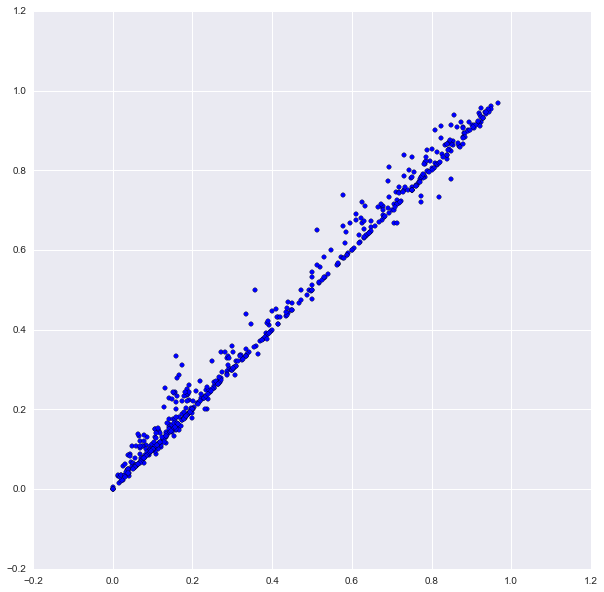

In [49]:
sns.plt.figure(figsize=(10,10))
sns.plt.scatter(share_9_15.share_9, share_9_15.share_15)

In [50]:
pca = PCA()

In [51]:
pca.fit(X)

PCA(copy=True, n_components=None, whiten=False)

In [52]:
pca.explained_variance_

array([ 18.96047794,  11.56092185,   2.00047061,   1.79492477,
         1.49129122,   0.86836408,   0.70579619,   0.55071948,
         0.4943396 ,   0.41332543,   0.37777677,   0.37242184,
         0.3173848 ,   0.30977866,   0.27413077,   0.25904749,
         0.22000211,   0.21620292,   0.2054596 ,   0.19216568,
         0.16748664,   0.16007363,   0.15580118,   0.14193413,
         0.13181656,   0.12070936,   0.12005112,   0.11357186,
         0.10677184,   0.09933346,   0.09145907,   0.08524865,
         0.07752174,   0.0683913 ,   0.05792058])

In [63]:
ls ../data/db15/helpers

bright_outlooks/                 new_non_cleaned_occupations.csv
delta_9_15.csv                   occ_codes/
emerged_all.csv                  tech_codes/
emerged_commodity_titles.csv     tt15.csv
emerged_tech_titles.csv          tt6.csv
names.csv                        tt9.csv
new_emerging_since_2009.csv


In [70]:
pd.read_csv('../data/db15/helpers/occ_codes/occupation_reference.csv')

IOError: File ../data/db15/helpers/occ_codes/occupation_reference.csv.csv does not exist